# ⏱️📈 Example 3: Hermite function performance comparison

This notebook compares the performance of the Hermite functions implemented in Numpy,
Numba, and (parallelized) Cython.

## 1) ☁️🔌 Imports

In [1]:
import os

import numpy as np
import perfplot
from matplotlib import pyplot as plt

from robust_hermite_ft import (
    hermite_function_basis,
    single_hermite_function,
    slow_hermite_function_basis,
)

%matplotlib widget

## 2) ⚙️📝 Configuration

In [2]:
# the x-values to evaluate the Hermite functions
X_FROM = -5.0
X_TO = 5.0
NUM_X = 2_501

# the scaling factor alpha to use
ALPHA = 1.0

# the orders of the Hermite functions to plot
ORDERS = [int(2 ** (i * 0.3333)) for i in range(0, 45)]

# whether to also include the single Hermite function evaluation in the plot
INCLUDE_SINGLE = True

# the path where to save the plot
SAVE_PATH = "../docs/hermite_functions/HermiteFunctionsPerformance.png"
# the resolution of the saved plot
DPI = 300

# the Numba-based version of the Hermite functions is pre-compiled to avoid the
# compilation overhead in the performance comparison
_ = slow_hermite_function_basis(
    x=np.linspace(start=X_FROM, stop=X_TO, num=NUM_X),
    n=ORDERS[0],
    alpha=ALPHA,
    jit=True,
)

## 3) 🏃🦾 Performance comparison

Output()

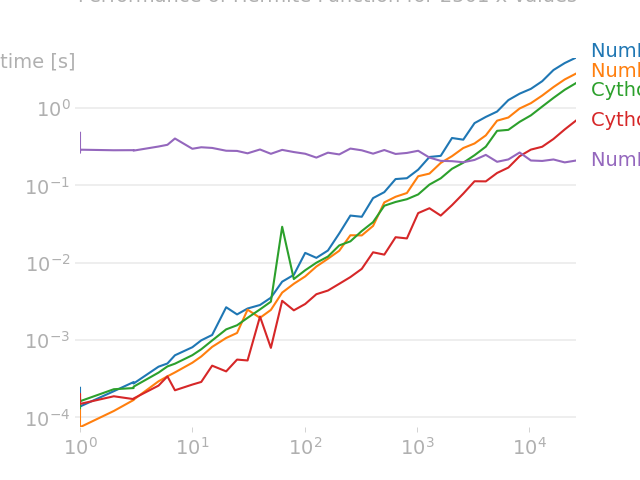

In [3]:
plt.close("all")

perfplot_kwargs = dict(
    setup=lambda n: (np.linspace(start=X_FROM, stop=X_TO, num=NUM_X), n, ALPHA),
    kernels=[
        lambda x, n, alpha: slow_hermite_function_basis(
            x=x,
            n=n,
            alpha=alpha,
            jit=False,
        ),
        lambda x, n, alpha: slow_hermite_function_basis(
            x=x,
            n=n,
            alpha=alpha,
            jit=True,
        ),
        lambda x, n, alpha: hermite_function_basis(x=x, n=n, alpha=alpha, workers=1),
        lambda x, n, alpha: hermite_function_basis(
            x=x,
            n=n,
            alpha=alpha,
            workers=-1,
        ),
    ],
    labels=[
        "NumPy Full Basis",
        "Numba Full Basis",
        "Cython Full Basis (1 Worker)",
        "Cython Full Basis (All Workers)",
    ],
    n_range=ORDERS,
    logx=True,
    logy=True,
    xlabel="Order of the Hermite Function Basis",
    title=f"Performance of Hermite Function for {NUM_X} x-values",
    show_progress=True,
    target_time_per_measurement=0.1,
)

if INCLUDE_SINGLE:
    perfplot_kwargs["kernels"].append(  # type: ignore
        lambda x, n, alpha: single_hermite_function(  # type: ignore
            x=x,
            n=n,
            alpha=alpha,
        ),
    )
    perfplot_kwargs["labels"].append("NumPy Single Function")  # type: ignore
    perfplot_kwargs["equality_check"] = None  # type: ignore


perfplot.show(**perfplot_kwargs)  # type: ignore

fig = plt.gcf()
ax = plt.gca()
ax.grid(which="both", axis="both")
# make the spines visible black and wider
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor("black")
    spine.set_linewidth(0.5)

ax.xaxis.label.set_color("black")
ax.yaxis.label.set_color("black")
ax.tick_params(axis="x", colors="black")
ax.tick_params(axis="y", colors="black")

ax.title.set_color("black")

fig.set_size_inches(10, 6)
fig.tight_layout()

plt.savefig(
    bbox_inches="tight",
    fname=os.path.join(os.getcwd(), SAVE_PATH),
    dpi=DPI,
)